<div style="background-color: #323031; color:#ffffff; padding:30px; -webkit-border-radius:5px; width:95%">

# Python for Finance - Part 2

&nbsp;

Part 2 of the workshop will teach you how to create subplots with matplotlib to visualize daily, monthly and annual returns and how to perform portfolio optimization using monte 
carlo simulation

<br>

**At the end of this second part, you will be able to**

- create subplots with matplotlib
- plot data to specific subplots
- perform portfolio optimization using monte carlo simulation
- visualize the results from a monte carlo simulation

<div class="alert alert-block alert-info" style="background-color: #f2f2f2; color:#3F3F3F;padding:30px; -webkit-border-radius:5px; width:95%">

<b>What to do when getting stuck</b>:
    <ol>
        <li>Search online:</li>
        <ol>
            <li>The answer box on the top of Google's results page</li>
            <li><a href="https://www.stackoverflow.com">stackoverflow.com</a> (task-specific solutions)</li>
            <li><a href="https://www.w3schools.com">w3schools.com</a> (basic python questions)</li>
            <li><a href="https://www.realpython.com">realpython.com</a> (topic-based tutorials)</li>
        </ol>
        <li>Ask the trainer if you struggle to find a solution.</li>
    </ol>

&nbsp;


### Task 1: Netflix returns

We will need the netflix stock price data and the daily, monthly and annual returns that you calculated in the first part of the workshop to create the chart later on.

Copy-paste your code to download the Netflix stock price data and calculate the daily, monthly and annual returns.

<details>
<summary><b>Click here to reveal solution code</b></summary>

```python
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

nflx = yf.download('NFLX', start='2009-01-01')

nflx['daily_ret'] = nflx['Adj Close'].pct_change()
nflx['daily_ret_1'] = nflx['daily_ret'] + 1
nflx['monthly_ret'] = nflx.resample('1M')['daily_ret_1'].transform('prod') - 1
nflx['annual_ret'] = nflx.resample('1A')['daily_ret_1'].transform('prod') - 1
```
</details>

&nbsp;

&nbsp;


## The object-oriented approach to plotting with matplotlib

Now that we have calculated the returns for each day and month, we can plot them in separate subplots inside a single chart.

Before we get into how to write the code to do that, let us first look at the two different approaches how you can create plots with matplotlib.

#### Using functions and the matplotlib objects

The first approach is to use the functions from the matplotlib library to create and customize a plot. This is what we did when we used the `plt.plot()` function to create a line or area plot, and the `plt.title()` or `plt.grid()` functions to set a title or grid. Remember that we imported the `matplotlib.pyplot` library under the alias `plt`. So when we call `plt.plot()` we are calling a function from the matplotlib library.

Below is an example of using the functions from the pyplot module.

[*********************100%***********************]  1 of 1 completed


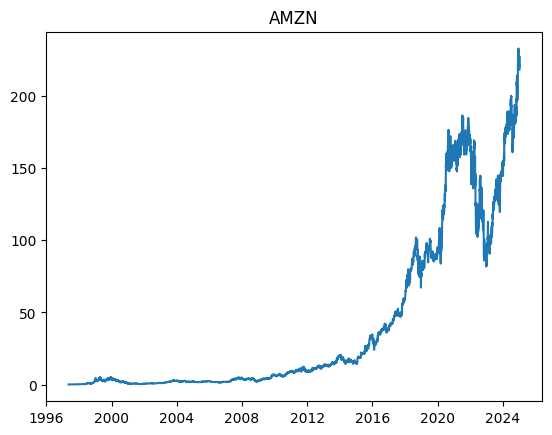

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt

amzn = yf.download('AMZN')
amzn.columns = amzn.columns.droplevel(1)

# using functions from pyplot/plt
plt.plot(amzn.index, amzn['Adj Close']) # fig and axes object created in the background
plt.title('AMZN')

plt.show()


This approach obscures the fact, that behind the scenes, you are creating a hierarchy of objects. To understand this better, we need to have a look at the different elements a chart in matplotlib consists of.

At the highest level we have the <span style="color:red"><b>figure</b></span> object, which is the general chart region, wherein a single or several plots can be created. The different plots within a figure are called <span style="color:green"><b>axes</b></span>. Within the <span style="color:green"><b>axes</b></span> objects, we have all the smaller objects like the <span style="color:blue"><b>title</b></span> , <span style="color:blue"><b>ticks</b></span> , <span style="color:blue"><b>lines</b></span> , <span style="color:blue"><b>legend</b></span>  etc.

It is a bit confusion that matplotlib calls the plots within a <span style="color:red"><b>figure</b></span> <span style="color:green"><b>axes</b></span>. An <span style="color:green"><b>axes</b></span> does thus not refer to the axis of a plot, but the actual plot itself. 

You can see below that a <span style="color:red"><b>figure</b></span> can consist of several plots or <span style="color:green"><b>axes</b></span> and that each <span style="color:green"><b>axes</b></span> object consists of smaller objects such as <span style="color:blue"><b>titles</b></span> and <span style="color:blue"><b>axis</b></span> etc. The <span style="color:green"><b>axes</b></span> objects are enclosed within the <span style="color:red"><b>figure</b></span> object and the <span style="color:blue"><b>axis</b></span> and <span style="color:blue"><b>title</b></span> objects are enclosed within the <span style="color:green"><b>axes</b></span> object.

<img src="https://www.dropbox.com/s/oaxsc7261jxsg4m/mpl_figure.png?raw=1">

#### Using methods at the object level

This brings us to the second approach of creating plots with matplotlib by working with the chart objects and applying methods to these objects.

See the example below to compare how you to create a simple line plot both ways using the plt functions and the ax methods.

#### Using ax object methods

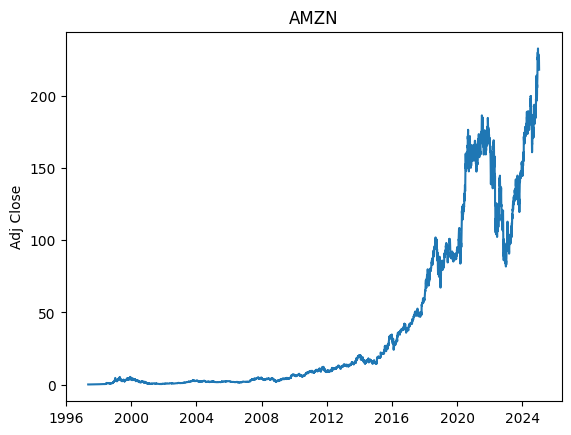

In [21]:
fig, ax = plt.subplots() # returning fig and axes object to us

ax.plot(amzn.index, amzn['Adj Close'])
ax.set_title('AMZN')
ax.set_ylabel('Adj Close')

plt.show()

##### Line 1: Creating the figure and axes object

We first create a figure and an axes object with `fig, ax = plt.subplots()`. The axes object is the actual plot that you can see. The figure object is the region within which this plot is being displayed, which is not directly visible.

##### Line 3: Adding a line plot

With `ax.plot(amzn['Adj Close'])` we call the plot() method of the ax object to add a line plot of the Adj Close column of the amzn dataframe. The important point to understand about this step is that the line is drawn at the level of the axes object and not the figure.

##### Line 4-5: Adding a title and yaxis label

All further customization of the axes are done on the level of the axes object itself. We use `.set_title('AMZN')` and `.set_ylabel('Adj Close')` to set a title and a ylabel.

### Task 2: Using an axes object to create a line plot

1. Create a figure and axes object using `plt.subplots()`
2. Plot the daily return rates from the Netflix stock dataset using the ax object
3. Add as a title 'NLFX' 
4. Add as a y-axis label 'Daily Return rate'.

&nbsp;

## Creating subplots with plt.subplots()

&nbsp;

We can use the `plt.subplots()` function to create a figure with several subplots. In the example below we create a figure with two subplots.

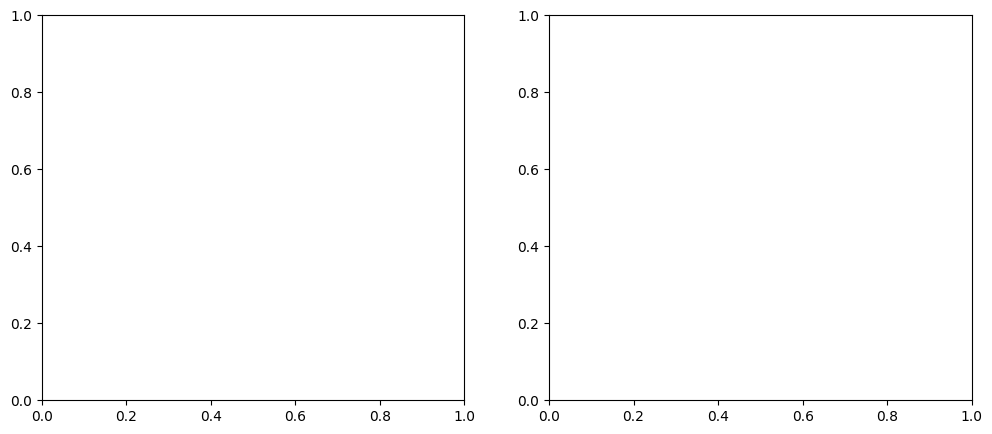

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

We set `nrows=1` and `ncols=2` to create two axes (plots) that are arranged next to each other in one row with two columns. The call to `plt.suplots()` will thus return three objects, the figure (overall chart region) and two axes (two subplots). We store the two axes under the name **ax1** and **ax2**. 

These two axes objects are returned as a numpy array with two values - one for the first and one for the second axes object. We can "unpack" the numpy array into the two separate axes objects by putting the parentheses around them as in `(ax1, ax2)`.

We set `figsize=(12,5)` to set the size of the figure to 12 inches wide and 5 inches high.


See below for an example of how to plot the daily and monthly returns from the Amazon stock dataset in the first and second subplot respectively.

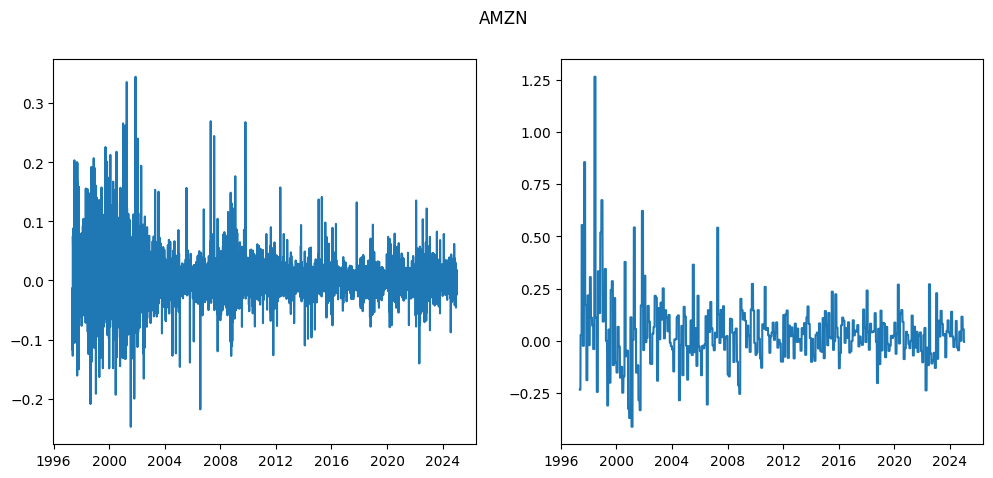

In [24]:
amzn['daily_ret'] = amzn['Adj Close'].pct_change()
amzn['daily_ret_1'] = amzn['daily_ret'] + 1
amzn['monthly_ret'] = amzn['daily_ret_1'].resample('1ME').transform('prod') - 1

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

fig.suptitle('AMZN')

ax1.plot(amzn['daily_ret'])
ax2.plot(amzn['monthly_ret'])

plt.show()

### Task 3: Creating subplots for Netflix returns

1. Create a figure with *three* subplots (axes) using the `plt.subplots()` function. 
    1. Arrange the three subplots *vertically*. 
    2. Set the figure size to 12*10 inches.
2. In the first subplot, plot the daily Netflix return rates. Use 'grey' as the color.
3. In the second subplot, plot the monthly Netflix return rates. Use 'black' as the color.
4. In the third subplot, plot the Adjusted price. Use 'red' as the color.
5. Add a y-axis labels to each subplot: 'Daily Return Rate', 'Monthly Return Rate', 'Adjusted'
6. Add 'Netflix' as a figure title.

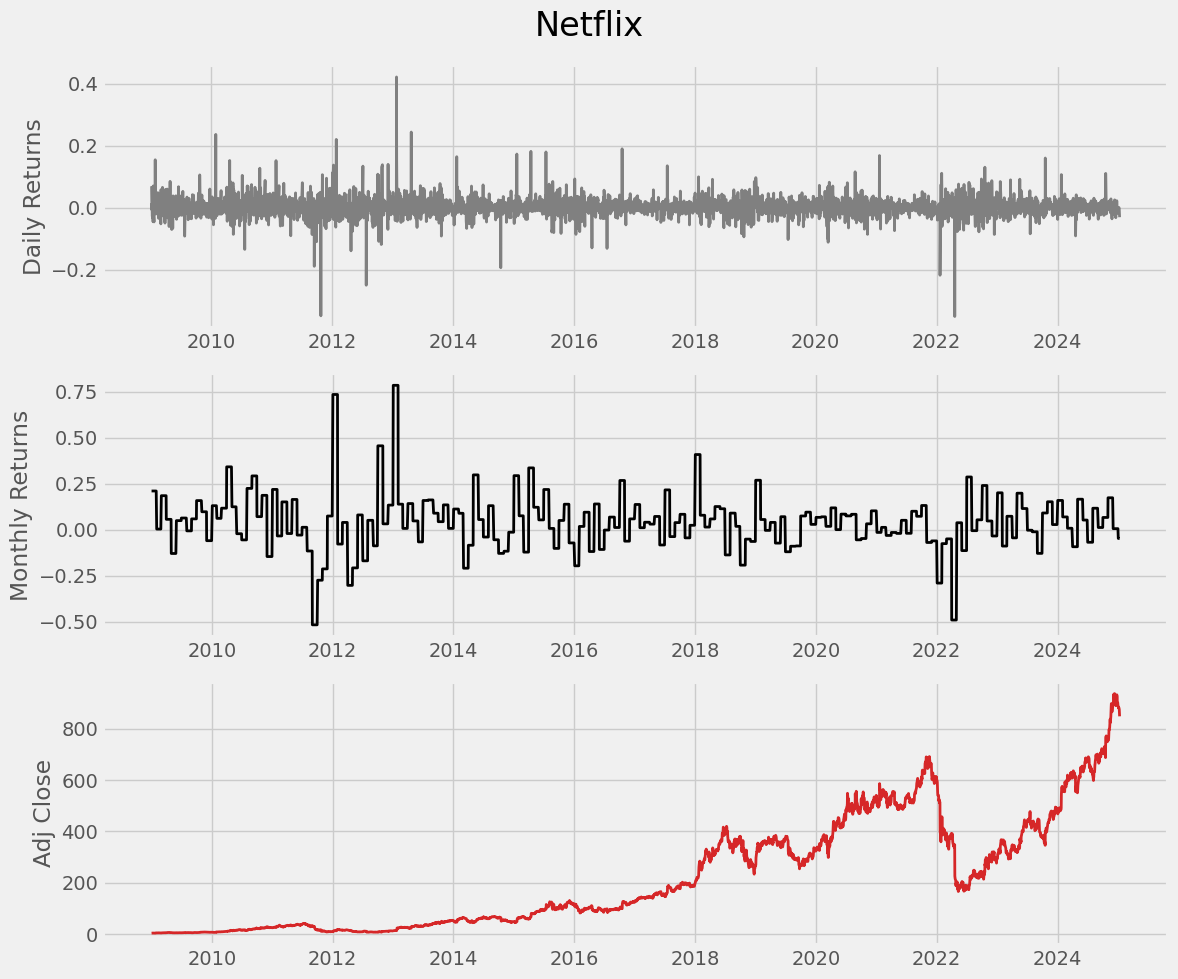

&nbsp;

&nbsp;


# Porfolio Optimization

Portfolio optimization is a popular tool in the finance and investment world to make decisions on how to best meet financial goals considering relative risks involved.

In this section you will learn how to apply portfolio optimization by running a **monte carlo simulation**, which uses randomly generated weights for each stock in your portfolio and then calculates the return and risk proportion for the portfolio using the **sharpe ratio**. 

The main logic of using monte carlo simulation for portfolio optimization is to repeat the random assignment of stock weights to simulate a large number of random portfolios in order to generate a distribution of returns, risks and the associated sharpe ratios. 

A visualization of the results of the simulation, can be used to get a better sense of the distribution of the returns, risks and sharpe ratios. Below you can see such a visualization for a portfolio consisting of Google, Facebook, Microsoft, Apple and Tesla stocks. Each dot in the scatter plot represents one simulated portfolio with randomly created weights. The horizontal position relates to the risk and the vertical position relates to the return of the portfolio. The sharpe ratio, that is, the return to risk ratio is color coded in the plot. The darker the dot, the higher the sharpe ratio. The portfolios with the lowest risk, highest return and the highest sharpe ratio are plotted in a distinct colour. Next to the scatter plot, there are three bar plots showing the weights for max sharpe, min risk and max return portfolio. 

The plot on the left is called the **efficient frontier** as the dots form a line along with the most efficient portfolios fall. This line consists of the portfolios with the maximum return for a given level of risk.

<img src="https://www.dropbox.com/scl/fi/1s9e3k6zp26rqmslf1rl0/po_plot02.png?rlkey=pvoru8hy2j4babpumo5lxpolf&st=wv1xksj8&raw=1">

### Steps involved in performing portfolio optimization using a monte carlo simulation

1. Download stock price data for multiple companies (the porfolio).
2. Calculate returns.
3. Creating random weights for each stock in the portfolio.
4. Calculate annualized return for the portfolio (all stocks combined).
5. Calculate the annualized risk for the portfolio (all stocks combined).
6. Calculate the sharpe ratio. $sharpe \ ratio = \frac{return}{risk}$.
7. Repeat step 2.- 6. n times to create the distribution of returns, risks and sharpe ratios.

<br>

<br>

### Task 1 - Downloading stock data and calculating regular daily returns.

1. Download the stock data for Google, Meta and Amazon from 01 Jan 2019 until today and store the data in the variable `my_stocks`.
2. Select the Adj Close columns and store the data in the variable `my_adj_close`.
3. Calculate the return rates and store the data in the variable `my_returns`.


<br>

<br>



## Matrix calculations for Annualised Portfolio Return

Below is a way to structure your data (adjusted closing prices) in a matrix form and then use a weight vector to compute portfolio returns for each trading day. Finally, we'll note how you might obtain the total return from these daily returns.

---

### 1. Adjusted Closing Price Matrix

Let $X$ be an $n(rows) \times m(columns)$ matrix of adjusted closing prices, where:
- $n$ = number of trading days (indexed by $i$)
- $m$ = number of stocks (indexed by $j$)

In a more explicit notation:

$$
X = 
\begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,3} & \dots & x_{1,m} \\
x_{2,1} & x_{2,2} & x_{2,3} & \dots & x_{2,m} \\
\vdots  & \vdots  & \vdots  & \ddots & \vdots  \\
x_{n,1} & x_{n,2} & x_{n,3} & \dots & x_{n,m} \\
\end{bmatrix}
$$

where $x_{i,j}$ is the adjusted closing price of stock $j$ on day $i$.

---

### 2. Weight Vector

Let $w$ be an $m \times 1$ column vector that contains the weights of each stock in the portfolio:

$$
\mathbf{w} \;=\; 
\begin{bmatrix}
w_1 \\[6pt]
w_2 \\[6pt]
w_3 \\[2pt]
\vdots \\[2pt]
w_m
\end{bmatrix}
$$

- $w_j$ is the weight of the $j$-th stock in the portfolio.
- $ \sum_{j=1}^{m} w_j = 1 $

---

### 3. Daily Portfolio Returns via Matrix Multiplication

To compute the $\mathbf{p}$, the **portfolio return for each trading day**, take the dot product of **each row** of $\mathbf{X}$ with the vector $\mathbf{w}$. In matrix form, this is simply:

$$
\mathbf{p} \;=\; X \, \mathbf{w}
$$

with
- $X$ is $n \times m$,
- $w$ is $m \times 1$,
- Thus $p$ will be $n \times 1$, giving you a daily return value for each of the $n$ days.

<br>

Explicitly, for the $i$-th day:

$$
\mathbf{p} \;=\; 
\begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,3} & \dots & x_{1,m} \\
x_{2,1} & x_{2,2} & x_{2,3} & \dots & x_{2,m} \\
\vdots  & \vdots  & \vdots  & \ddots & \vdots  \\
x_{n,1} & x_{n,2} & x_{n,3} & \dots & x_{n,m} \\
\end{bmatrix}
\begin{bmatrix}
w_1 \\[6pt]
w_2 \\[6pt]
w_3 \\[2pt]
\vdots \\[2pt]
w_m
\end{bmatrix}
\;=\;
\begin{bmatrix}
p_1 \\[4pt]
p_2 \\[4pt]
p_3 \\[4pt]
\vdots \\[4pt]
p_n
\end{bmatrix}
$$


### Demo on Numpy Matrix Calculations

In [1]:
import numpy as np




<br>

<br>



---

### 4. Total Portfolio Return (Compounded)

If $p_i$ represents the portfolio’s **daily return** for day $i$, the total (compounded) return $R_{\text{total}}$ over all $n$ days can be calculated by multiplying $1 + p_i$ for each day, and then subtracting 1 at the end:

$$
R_{\text{total}} 
= \prod_{i=1}^{n} \bigl(1 + p_i\bigr) 
\;-\; 1
$$

This formula accounts for compounding effects: each day’s return feeds into the next day’s starting value.




---

### 5. Annualized Portfolio Return (Average)

After you have calculated the total portfolio return $R_{\text{total}}$ over your entire investment period, you often want to **annualize** this return to make it comparable across different time spans.

#### Formula for Annualized Return

Given:
- $R_{\text{total}}$: the total compounded return over the entire period.
- $T$: the length of the holding period, in __years__.

The **annualized return** $R_{\text{annual}}$ is often computed as:

$$
R_{\text{annual}} = (1 + R_{\text{total}})^{\frac{1}{T}} - 1
$$


#### Determining $T$

You can base $T$ on the number of **trading** days, i.e. 252.  
     $$
     T = \frac{n}{252}
     $$

with $n$ being the total length of $X$.



<br>

<br>

### Task 2 - Calculating the daily portfolio returns

1. Use the weights 0.5, 0.3 and 0.2 as a *numpy array* and assign to the name `my_weights`. 
2. Calculate the portfolio returns and assign to the name `my_port_returns`.

### Task 3 - Calculating the total porftolio return

1. Calculate the total portfolio return, i.e. the compounded return, for the entire time period and assign to the name `my_total_ret`.
2. How do you read the value of `my_total_ret` as a percentage return on your investment?

### Task 4 - Calculating the annualised return

1. Calculate the annualised return, i.e. the average return per year, based on the total return and assign to the name `my_ann_ret`.
2. How do you read the value of `my_ann_ret` as an annual percentage return on your investment?


&nbsp;

&nbsp;

## Risk of a portfolio and Sharpe Ratio

### Calculation portfolio risk using the standard deviation

We can model the risk of the portfolio using the **standard deviation of the portfolio returns**. In order to **annualise the portfolio standard deviation**, we have to multiply it with the square root of 250. This is because the standard deviation is the square root of the variance and the annualized variance and the annualized standard deviation have to be consistent.


Let:
- $p_1, p_2, \dots, p_n$ be the **daily returns** of your portfolio (i.e., the entries of your vector $\mathbf{p}$).
- $\bar{p}$ be the **average** (mean) daily return.

The **daily standard deviation** of the portfolio returns is:

$$
\sigma_{\text{daily}} \;=\; \sqrt{
    \frac{1}{n - 1}
    \sum_{i=1}^{n} 
    \bigl(p_i - \bar{p}\bigr)^{2}
}.
$$

To **annualise** this daily volatility, assuming $D$ trading days in a year (e.g., 250), multiply by $\sqrt{D}$:

$$
\sigma_{\text{annual}} \;=\; 
\sigma_{\text{daily}} \times \sqrt{250}.
$$



### Sharpe Ratio - Risk adjusted returns

A popular way to estimate the expected return relative to its risk is the sharpe ratio, which combines the return rate and portfolio standard deviation together with the risk free rate. The risk free rate reflects the expected return for a risk-free investment. Treasury bonds are often used as an indicator for this. Given the current interest rate environment, we will assume a risk-free rate of 5%.

$ \text{Sharpe Ratio} = \frac{R_{\text{annual}} - R_{\text{free}}}{\sigma_{\text{annual}}}$

where: 

- $R_{\text{annual}} = $  portfolio return rate
- $R_{\text{free}} = $ risk free rate (5%)
- $\sigma_{\text{annual}} = $ portfolio standard deviation

The Sharpe Ratio measures how efficiently a portfolio generates excess return relative to the risk it takes. A Sharpe Ratio larger than 1 indicates that the portfolio delivers more excess return than the risk it assumes, while a ratio below 1 means the portfolio's excess return is not sufficient to justify the level of risk.

### Task 5 - Portfolio risk and Sharpe Ratio

Using the portfolio that you have created in the previous exercise:

1. Calculate the portfolio risk based on the standard deviation of the portfolio returns and **annualize the risk**. Assign the portfolio risk to the name `my_port_sd`.
2. Calculate the sharpe ratio using a risk free rate of 5% and assign to the name `my_sharpe`.
3. How do you interpret the sharpe ratio?

&nbsp;

&nbsp;

## Portfolio optimization using a monte carlo simulation

Let us review all the steps involved in calculating the sharpe ratio for a specific portfolio.

1. Downloading the stock price data
2. Calculating the returns for the individual stocks
3. Setting weights for each stock and calculating the portfolio return using the weights
4. Calculating the total and annualized return
5. Calculating the annualized portfolio standard deviation
6. Calculating the sharpe ratio

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

# setting tickers and risk free rate
tickers = ['GOOG', 'META', 'AMZN']
rfr = .05

# downloading the stock price data
my_stocks = yf.download(tickers, start='2018-12-31', end='2021-12-31')

# selecting the adjusted close columns
my_adj_close = my_stocks['Adj Close']

# calculating the stock returns
my_stock_ret = my_adj_close.pct_change()

# creating weights
my_weights = np.array([0.50, 0.3, 0.2])

# calculating portfolio returns
my_port_rets = my_stock_ret.dot(my_weights)

# calculating the total and annualized return
my_total_ret = (my_port_rets+1).prod() - 1
n_years = len(my_stock_ret) / 250
my_ann_ret = (my_total_ret+1)**(1/n_years) - 1

# calculating the portfolio risk
my_port_sd = my_port_rets.std() * np.sqrt(250)

# calculating the sharpe ratio
my_sharpe = (my_ann_ret - rfr) / my_port_sd

print(my_sharpe)


[*********************100%***********************]  3 of 3 completed

1.166618815520473


A **monte carlo simulation** repeats this process a large number of times and uses randomly created weights each time. This way we can get a sense of the distribution of returns and risks. 

Below you can see the function that we have written for this.

The function takes five arguments:
1. `'tickers`: The stock tickers for the portfolio
2. `'rfr`: The risk-free-rate
3. `'start`: A start date
4. `end`: An end date
5. `'n_sims'`: The number of simulations to be run

Only the `'tickers'` argument has to be provided, since the remaining parameters have default values. The function will per default use the data from the past 5 years, simulate 1000 portfolios and uses a risk free rate of 1% to calculate the sharpe ratios.


The function returns four arrays for the:
- randomly created weights
- annualized standard deviations
- annualized returns
- sharpe ratios

Each of these arrays has 1000 elements or rows for the array containing the weights, since we ran 1000 simulations.

In [31]:
import datetime

def monte_carlo_sim(tickers, rfr=0.01, n_sims=1000, start=None, end=None):
    # create start date if non is provided
    if not start:
        start = datetime.datetime.today() - datetime.timedelta(365*5)
    
    # download stock price data
    stock_data = yf.download(tickers, start, end)
    adj_close = stock_data['Adj Close']
    stock_returns = adj_close.pct_change()
    
    # empty lists to store weights, annualized return and risks and sharpe ratios for each simulated portfolio
    port_wts = []
    port_ann_rets = [] 
    port_risks = []
    port_sharpe_rts = []

    # loop to generate all random weight portfolios
    for i in range(n_sims):
        # create random weights
        wts = np.random.uniform(size=len(tickers)) 
        wts = wts / sum(wts)
        
        # calculate portfolio returns, annualized return and risk and sharpe ratios
        port_rets = stock_returns.dot(wts)
        total_ret = (port_rets + 1).prod() - 1
        ann_ret = (total_ret + 1)**(1/(len(stock_returns)/252)) - 1
        port_sd = port_rets.std() * np.sqrt(250)
        sharpe = (ann_ret - rfr) / port_sd
    
        # add weights, annualized returns and risks and sharpe ratios to lists
        port_wts.append(wts)
        port_ann_rets.append(ann_ret)
        port_risks.append(port_sd)
        port_sharpe_rts.append(sharpe)
    
    return np.array(port_wts), np.array(port_risks), np.array(port_ann_rets), np.array(port_sharpe_rts)

We create a new list `tickers`for the stocks we want to include in the portfolio and pass the list to the `monte_carlo_sim` function. All other parameters use the default value.

In [32]:
tickers = ['AAPL', 'NFLX', 'GOOG', 'AMZN', 'TSLA']

port_wts, port_risks, port_ann_rets, port_sharpe_rts = monte_carlo_sim(tickers, n_sims=10000, start='2011-01-01')

[*********************100%***********************]  5 of 5 completed


Let us confirm that we get the correct number of values

In [33]:
print(port_wts.shape)
print(port_risks.shape)
print(port_ann_rets.shape)
print(port_sharpe_rts.shape)

(20000, 5)
(20000,)
(20000,)
(20000,)


Let us print the values for the first portfolio that we simulated

In [34]:
port_i = 0
print(f'Portfolio {port_i+1}:')
print('='*19)
print('weights:')
for i, comp in enumerate(tickers):
    comp = '- '+comp
    print(f'{comp:>8} {port_wts[port_i][i]:9.2f}')
print(f'risk: {port_risks[port_i]:12.2f}')
print(f'return: {port_ann_rets[port_i]:10.2f}')
print(f'sharpe ratio: {port_sharpe_rts[port_i]:.2f}')

Portfolio 1:
weights:
  - AAPL      0.27
  - NFLX      0.12
  - GOOG      0.37
  - AMZN      0.06
  - TSLA      0.18
risk:         0.26
return:       0.32
sharpe ratio: 1.20


### Visualizing the efficient frontier

As a first step, we can visualize the distribution of risk and return only with a scatter plot with the `plt.scatter()` function. We plot the portfolio risk on the x-axis and the portfolio returns on the y-axis.

As in the first example, the dots again create the distinct shape, the so-called efficient frontier, which represents the most efficient portfolios. Portfolios that lie on this frontier represent the portfolios with the highest return for a given level of risk or vice versa. Although we have only simulated a limited number of portfolios, we know that there are no possible portfolios outside the edge of the data cloud. As you increase the number of simulations the edge will become smoother.

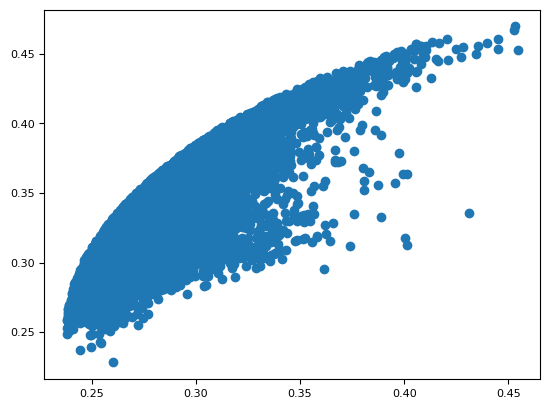

In [35]:
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 8

plt.scatter(port_risks, port_ann_rets)

We pass the `port_sharpe_rts` array to the `c` parameter of the `plt.scatter()` function in order for the color of the dots to indicate the sharpe ratio.

The colors to be used for the dots can be changed with the `cmap` parameter. We use the Purple-Blue (PuBu) colormap.

With the `plt.colorbar()` function, we can display a colorbar next to the plot that shows the mapping of colors and values.

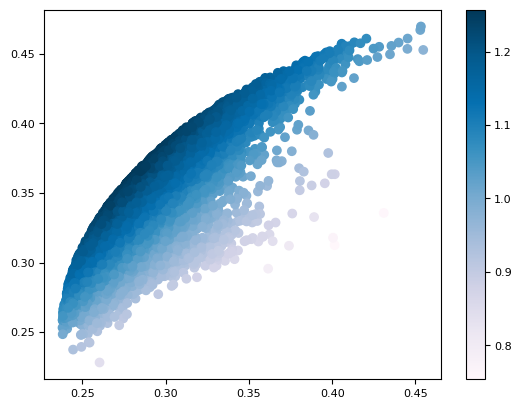

In [40]:
plt.scatter(port_risks, port_ann_rets, c=port_sharpe_rts, cmap='PuBu')

plt.colorbar()

### Highlighting the max sharpe ratio portfolio

We also want to highlight the max sharpe portfolio, which is the portfolio with the highest sharpe ratio. We thus need to find the portfolio risk and annualized return for the portfolio with the highest sharpe ratio. For this, we can use the `.argmax()` method, which gives us the position of the highest value in an array.

Have a look at the example below. We create an array with the values 1, 3, 1, 0. 3 is the largest value and its position is 1 (remember that in Python we start counting positions from 0).

By using `.argmax()` on the array, we get the position of the largest value.

In [41]:
my_array = np.array([1, 3, 1, 0])

print(my_array.argmax())

1


We can use the `.argmax()` method on the **port_sharpe_rts** array to get the position of the portfolio with the highest sharpe ratio. From all 10000 simulated portfolios, the one at this particular position has the highest sharpe ratio.

In [42]:
port_sharpe_rts.argmax()

10526

Let us store this value in a variable.

In [43]:
idx_max_sharpe = port_sharpe_rts.argmax()

We can get the annualized risk and return for the max sharpe portfolio using the `port_sharpe_rts.argmax()` inside the square brackets to select the port_risk for the portfolio at position 2914.

In [44]:
print(port_risks[idx_max_sharpe])
print(port_ann_rets[idx_max_sharpe])

0.2855929655872485
0.3689976791942158


We store the values in two values (line 1+2) and use them to plot a single red dot for the max sharpe portfolio (line 7).

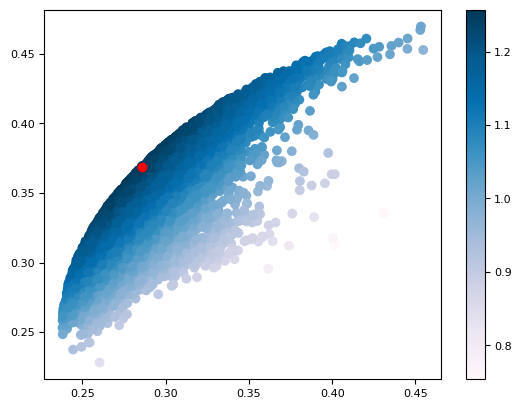

In [45]:
max_sharpe_x = port_risks[idx_max_sharpe]
max_sharpe_y = port_ann_rets[idx_max_sharpe]

plt.scatter(port_risks, port_ann_rets, c=port_sharpe_rts, cmap='PuBu')
plt.colorbar()

plt.scatter(max_sharpe_x, max_sharpe_y, color='red')

plt.show()

### Task 5 - Comparing portfolio weights



1. Run the `monte_carlo_sim` function with a selection of stocks of your choice. To reproduce the chart below use the following arguments:
    - `tickers=['AAPL', 'NFLX', 'GOOG', 'AMZN', 'TSLA']`
    - `start='2011-01-01'`
    - `end='2025-01-16'`
    - `n_sims=20000`
2. Store the weights for the min variance, max return and max sharpe ratio portfolios using the `.argmax()` method in three separate variables.
3. Create a figure with three axes objects next to each other.
4. Generate three bar plots as below for the min variance, max return and max sharpe ratio portfolio.
5. Add titles to each bar plot
6. Use the colors from the tab20 colormap for the bars.
7. To recreate the plot in the same styling use these two lines at the top of the code cell.
```python
plt.style.use("fivethirtyeight")
plt.rcParams["font.size"] = 8
```

<img src="https://www.dropbox.com/scl/fi/fuutt45pekh99jg130yek/po_plot01.png?rlkey=3ovidkbyzotopur6kd40u0nrz&st=bbubyia5&raw=1" width=800px>

<br>

### Task 6 - Combined Chart

1. Extend the code from task 5 to also add a scatter plot with portfolio risk on the x-axis and portfolio return on the y-axis as the first chart.
2. Add a color bar to the first chart.
3. Highlight the max sharpe, max return and min risk portfolios on the scatter plot.

<img src="https://www.dropbox.com/scl/fi/1s9e3k6zp26rqmslf1rl0/po_plot02.png?rlkey=pvoru8hy2j4babpumo5lxpolf&st=wv1xksj8&raw=1" width=800px>

<div  style="color:#1b1b1b; background-color:#f2f2f2; padding:30px; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">

### Final task - Please give us your feedback!

In order to adapt our training to your needs and provide the most valuable learning experience for you, we depend on your feedack. 

We would be grateful if you could take a moment before the end of the workshop to leave your feedback!

[Click here to open the survey!](https://lse.eu.qualtrics.com/jfe/form/SV_e4gllqd7FvmCNzo?coursename=Python%for%Finance&topic=Python&link=https://lsecloud-my.sharepoint.com/:u:/g/personal/m_wiemers_lse_ac_uk/EYOQbnEf07hFgcfI0q7ssSMB5neRa_pdi-yHhp07u-CkMQ?e=JhxoVig&prog=DS&cohort=WT24&link2=https://lsecloud-my.sharepoint.com/:u:/g/personal/m_wiemers_lse_ac_uk/EfX5XRZ0aTRJn701TRVDF1wB-9tY24gydtNy1FRaWytAJA?e=IzBImP)

&nbsp;

&nbsp;

## Appendix

### A - Combining scatter and bar plots in one chart

See below for a function that lets you plot the results of a monte carlo simulation in a single chart.

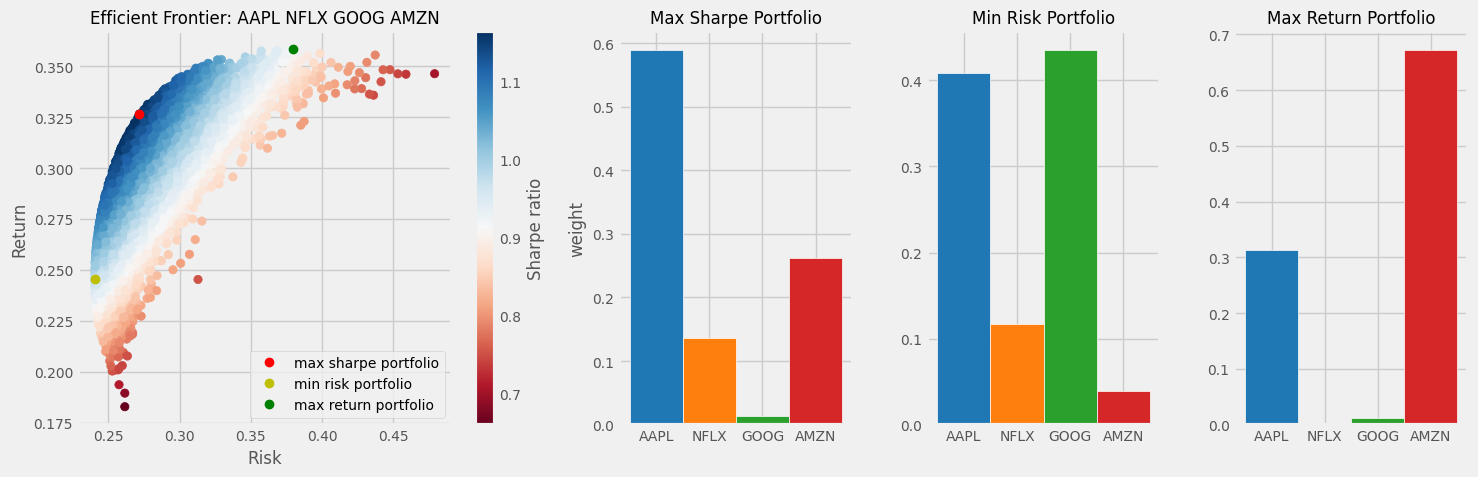

In [41]:
def po_plot(port_wts, port_sds, port_ann_rets, port_sharpe_rts, tickers):
    import matplotlib

    plt.style.use("ggplot")
    plt.style.use("fivethirtyeight")

    plt.rcParams["xtick.labelsize"] = 10
    plt.rcParams["ytick.labelsize"] = 10
    plt.rcParams["axes.labelsize"] = 12
    plt.rcParams["axes.titlesize"] = 12
    plt.rcParams["legend.fontsize"] = 10
    
    fig, axs = plt.subplots(1, 4, figsize=(15,5), gridspec_kw={'width_ratios': [2, 1, 1, 1]})

    scatter = ax1.scatter(x=port_sds, y=port_ann_rets, c=port_sharpe_rts, cmap='RdBu')
    ax1.plot(port_sds[port_sharpe_rts.argmax()], port_ann_rets[port_sharpe_rts.argmax()], 'ro', label='max sharpe portfolio')
    ax1.plot(port_sds[port_sds.argmin()], port_ann_rets[port_sds.argmin()], 'yo', label='min risk portfolio')
    ax1.plot(port_sds[port_ann_rets.argmax()], port_ann_rets[port_ann_rets.argmax()], 'go', label='max return portfolio')

    cbar = plt.colorbar(scatter, ax=ax1)
    cbar.set_label('Sharpe ratio')

    ax1.set_title(f'Efficient Frontier: {" ".join(tickers)}')
    ax1.set_xlabel('Risk')
    ax1.set_ylabel('Return')


    axs[1].bar(x=tickers, height=port_wts[port_sharpe_rts.argmax()], color=plt.get_cmap('tab10').colors, width=1, edgecolor='white')
    axs[1].set_ylabel("weight")
    axs[1].set_title('Max Sharpe Portfolio')
    axs[2].bar(x=tickers, height=port_wts[port_sds.argmin()], color=plt.get_cmap('tab10').colors, width=1, edgecolor='white')
    axs[2].set_title('Min Risk Portfolio')
    axs[3].bar(x=tickers, height=port_wts[port_ann_rets.argmax()], color=plt.get_cmap('tab10').colors, width=1, edgecolor='white')
    axs[3].set_title('Max Return Portfolio')


    ax1.legend()
    plt.tight_layout()
    plt.show()

    plt.rcParams.update(matplotlib.rcParamsDefault)
    
po_plot(my_port_wts, my_port_risks, my_port_ann_rets, my_port_sharpe_rts, my_tickers)

### 

### B - Max sharpe portfolio with pypfopt library

With pypfopt you can do portfolio optimization in Python more conveniently. The library provides functions to calculate the efficient frontier using optimization algorithms, which creates the output much faster than using a simulation. It also features functions to calcualte the asset allocation given a certain investment.

The installation via conda is not currently supported but you can install it through pip, the general Python package management system. To install PyPortfolioOpt we also have to install a package CMake using the same command

In [184]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.2/890.2 kB 1.7 MB/s eta 0:00:00a 0:00:01


Below is an example of how you can initiate the efficient frontier using the annualized returns for each stock and the annualized covariance matrix.

In [185]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from pypfopt import expected_returns
from pypfopt import risk_models
from pypfopt import EfficientFrontier

tickers = 'AMZN NFLX MSFT META GOOG'.split()
stock_prices = yf.download(tickers, start='2000-01-01')['Adj Close']
stock_prices = stock_prices.dropna()

# calculate annualized return
mu = expected_returns.mean_historical_return(stock_prices)

# calculate annualized covariance matrix
S = risk_models.sample_cov(stock_prices)

# initiate efficient frontier
ef = EfficientFrontier(mu, S)

[*********************100%***********************]  5 of 5 completed


Once the efficient frontier has been intiated, you can calculate the maximum sharpe ratio given a risk-free rate. The `.max_sharpe()` function returns the weights for the max sharpe portfolio.

In [186]:
# solve for maximum sharpe ratio
ef.max_sharpe(risk_free_rate=.02)

OrderedDict([('AMZN', 0.123632647012705),
             ('GOOG', 0.0651935377378962),
             ('META', 0.0002610400534857),
             ('MSFT', 0.5281052988141153),
             ('NFLX', 0.2828074763817977)])

We can get the expected annual return, risk and sharpe ratio with `ef.portfolio_performance(verbose=True)`

In [187]:
ef.portfolio_performance(verbose=True)

Expected annual return: 30.3%
Annual volatility: 26.4%
Sharpe Ratio: 1.07


/opt/miniconda3/envs/py312/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(0.30252911219307554, 0.26442007186936073, 1.0684858762638176)

The CLA (critical line algorithm) enables us to calculate the values of efficient frontier. Similar to the `EfficientFrontier` class, it requires the annualized stock returns and the annualized covariance matrix. 

The efficient frontier values can be visualized with the `plot_efficient_frontier()` function from the plotting module.

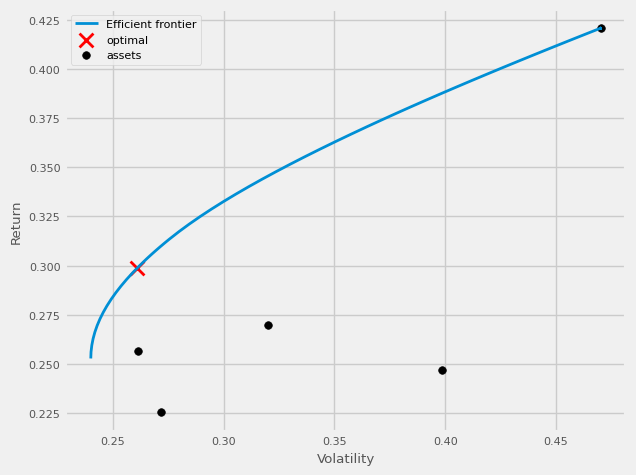

In [188]:
from pypfopt import CLA
from pypfopt import plotting

cla = CLA(mu, S)
plotting.plot_efficient_frontier(cla)

plt.show()

We can retrieve the values from the efficient frontier with the `frontier_values` attribute of the `cla` object.

The first array contains the returns. The second one contains the portfolio standard deviations.

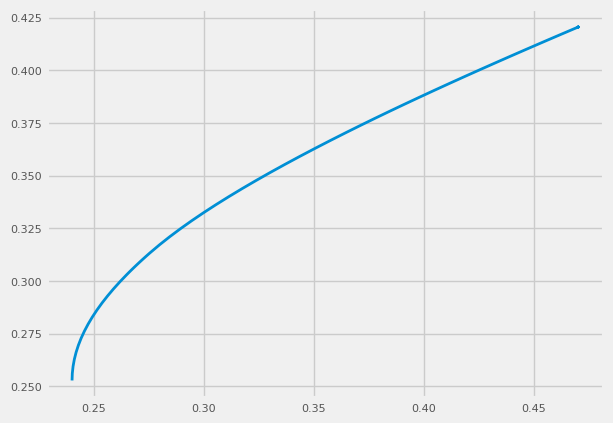

In [189]:
ef_risks = np.array(sorted(cla.frontier_values[1]))
ef_rets = np.array(sorted(cla.frontier_values[0]))

plt.plot(ef_risks, ef_rets)

plt.show()

Now we can get the optimal return for a given level of risk or vice versa.

In [190]:
max_risk = .40
optimal_ret = ef_rets[ef_risks > max_risk][0]

print(f'Optimal return for max risk of {max_risk}: {round(optimal_ret, 2)}')

Optimal return for max risk of 0.4: 0.39


For more information on the pypfopt library, check out their [website](https://pypi.org/project/pyportfolioopt/), which also has a series of jupyter notebooks with portfolio optimization recipes hosted on [mybinder](https://github.com/robertmartin8/PyPortfolioOpt/tree/master/cookbook).

---

### C - Calculating portfolio standard deviation using the covariance matrix

The standard deviation of the portfolio returns can also be calculated using the covariance matrix. Below is an exmaple for a portfolio with two stocks.

$$\sigma_P^2 = w_1^2  \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1w_2 \sigma_{1,2}$$

where
- $\sigma_P^2 = $ the portfolio variance
- $\sigma_1 = $ the variance of stock 1
- $\sigma_2 = $ the variance of stock 2
- $w_{1} = $ the weight of stock 1
- $w_{2} = $ the weight of stock 2
- $\sigma_{1,2} = $ the covariance between stock 1 and stock 2


This formula can be simplified by using the covariance matrix and calculating the dot product of the covariance matrix and  weights vector as below.

$$ \sigma_P^2 = \begin{bmatrix} w_{1} & w_{2} \end{bmatrix} \begin{bmatrix} \sigma_1^2 & \sigma_{1,2}  \\ \sigma_{2,1} & \sigma_2^2 \end{bmatrix}  \begin{bmatrix} w_{1} \\ w_{2} \end{bmatrix}  $$

The portfolio risk formula indicates that it is dependent on the variance of the individual stocks and the relationship between the stocks. How it compares to the simple weighted average of the individual stock variances will depend on the strength of the relationship between the stocks. Since stocks are usually correlated the portfolio variance is almost always substantially larger than the simple weighted average of the stock variances.

Below is the formula for a portfolio with three stocks. The portfolio variance is calculate by taking the weighted average of the three individual stock variances (the first three terms) and a further adjustment based on the covariance of the three stocks (last term).

$$ \sigma_P^2 = \begin{bmatrix} w_1 & w_2 & w_3 \end{bmatrix} 
\begin{bmatrix}\sigma^2_{1} & \sigma_{1,2} & \sigma_{1,3} \\
\sigma_{2,1} & \sigma^2_{2} & \sigma_{2,3} \\
\sigma_{3,1} & \sigma_{3,2} & \sigma^2_{3} 
\end{bmatrix} 
\begin{bmatrix} w_1 \\ w_2 \\w_3 \end{bmatrix} $$

$$ \sigma_P^2 =  w_1^2\sigma^2_{1, 1} + w_2^2\sigma^2_{2, 2} + w_3^2\sigma^2_{3, 3} + 2w_1w_2\sigma^2_{1, 2} 2w_1w_3\sigma^2_{3, 1} 2w_2w_3\sigma^2_{3, 2}$$

#### Covariance matrix

We can calculate the covariance matrix with the .cov() method

In [19]:
stock_ret = yf.download(['META', 'NFLX', 'GOOG'], start='2010-01-01')['Adj Close'].pct_change().dropna()
stock_ret.iloc[[0, -1]]

[*********************100%%**********************]  3 of 3 completed


GOOG      META      NFLX
Date                                    
2012-05-21  0.022835 -0.109861  0.025443
2023-11-17 -0.018745 -0.002035 -0.006382

In [20]:
cov_mat = stock_ret.cov()
cov_mat

GOOG      META      NFLX
GOOG  0.000294  0.000238  0.000214
META  0.000238  0.000643  0.000271
NFLX  0.000214  0.000271  0.000931

Since the covariance is the average variance per trading day, we have to multiply the covariance matrix by 250, the average number of trading days in a year, to calculate the risk across the whole year. 

In [21]:
cov_mat *= 250
cov_mat

GOOG      META      NFLX
GOOG  0.073402  0.059429  0.053445
META  0.059429  0.160820  0.067675
NFLX  0.053445  0.067675  0.232693

Now we can calculate the portfolio variance using the formula from above. We use the `.dot()` method to calculate the matrix products.

In [23]:
weights = np.array([0.5, .3, .2])
port_var = cov_mat.dot(weights).dot(weights.T)
print(port_var)

0.07877076363737133


We can also express the portfolio risk as the standard deviation by taking the square root of the variance. This is in the same units as the returns, which makes it easier to use.

In [24]:
port_sd = np.sqrt(port_var)
print('The portfolio standard deviation is:', port_sd)

The portfolio standard deviation is: 0.28066129700650094
